# Data Collection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install yfinance

In [ ]:
import datetime
import yfinance as yf
import pandas as pd

# data interval
interval = "5m"
# period ='1mo'

# start & end date
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=59)

# Raw data root
raw_data_root = "/content/drive/MyDrive/FYP/Stock/DataSet/Raw/"

#  symbols
symbols = ["AAPL", "TSLA", "SBUX"]

In [ ]:
# # collect data
# for symbol in symbols:
#   data = yf.download(symbol, start=start_date, end=end_date, interval=interval)
#   data.index = data.index.tz_convert(None)

#   # Save the DataFrame to the specified path
#   df = pd.DataFrame(data)
#   raw_file_path = raw_data_root + symbol + '_OHVLC_' + interval + '.csv'
#   df.to_csv(raw_file_path)

# Data Preprocessing

In [ ]:
pip install utils

In [ ]:
pip install mxnet-mkl==1.6.0 numpy==1.23.1

In [ ]:
import math
import pandas as pd
import numpy as np

from utils import *

import time
import datetime
from datetime import timezone

from mxnet import nd, autograd, gluon
from mxnet.gluon import nn, rnn
import mxnet as mx


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_regression

import xgboost as xgb
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
dataset_aapl_df=pd.read_csv("/content/drive/MyDrive/FYP/Stock/DataSet/Raw/AAPL_OHVLC_5m.csv")
dataset_aapl_df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
1,Datetime,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-09-23 13:30:00,226.69000244140625,226.69000244140625,227.52999877929688,225.86000061035156,227.33999633789062,4462853
3,2024-09-23 13:35:00,227.77000427246094,227.77000427246094,227.8000030517578,226.19000244140625,226.72000122070312,1492770
4,2024-09-23 13:40:00,227.30499267578125,227.30499267578125,227.83999633789062,227.14999389648438,227.77999877929688,1102477


In [ ]:
dataset_tsla_df=pd.read_csv("/content/drive/MyDrive/FYP/Stock/DataSet/Raw/AAPL_OHVLC_5m.csv")
dataset_tsla_df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
1,Datetime,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-09-23 13:30:00,226.69000244140625,226.69000244140625,227.52999877929688,225.86000061035156,227.33999633789062,4462853
3,2024-09-23 13:35:00,227.77000427246094,227.77000427246094,227.8000030517578,226.19000244140625,226.72000122070312,1492770
4,2024-09-23 13:40:00,227.30499267578125,227.30499267578125,227.83999633789062,227.14999389648438,227.77999877929688,1102477


In [ ]:
dataset_sbux_df=pd.read_csv("/content/drive/MyDrive/FYP/Stock/DataSet/Raw/AAPL_OHVLC_5m.csv")
dataset_sbux_df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
1,Datetime,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-09-23 13:30:00,226.69000244140625,226.69000244140625,227.52999877929688,225.86000061035156,227.33999633789062,4462853
3,2024-09-23 13:35:00,227.77000427246094,227.77000427246094,227.8000030517578,226.19000244140625,226.72000122070312,1492770
4,2024-09-23 13:40:00,227.30499267578125,227.30499267578125,227.83999633789062,227.14999389648438,227.77999877929688,1102477


In [ ]:
dataset_aapl_df = dataset_sbux_df.iloc[2:].reset_index(drop=True)
dataset_tsla_df = dataset_sbux_df.iloc[2:].reset_index(drop=True)
dataset_sbux_df = dataset_sbux_df.iloc[2:].reset_index(drop=True)

In [ ]:
dataset_aapl_df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,2024-09-23 13:30:00,226.69000244140625,226.69000244140625,227.52999877929688,225.86000061035156,227.33999633789062,4462853
1,2024-09-23 13:35:00,227.77000427246094,227.77000427246094,227.8000030517578,226.19000244140625,226.72000122070312,1492770
2,2024-09-23 13:40:00,227.30499267578125,227.30499267578125,227.83999633789062,227.14999389648438,227.77999877929688,1102477
3,2024-09-23 13:45:00,227.72999572753906,227.72999572753906,227.8000030517578,226.94039916992188,227.2899932861328,817375
4,2024-09-23 13:50:00,227.25999450683594,227.25999450683594,227.76499938964844,227.05999755859375,227.74000549316406,693440


In [ ]:
dataset_tsla_df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,2024-09-23 13:30:00,226.69000244140625,226.69000244140625,227.52999877929688,225.86000061035156,227.33999633789062,4462853
1,2024-09-23 13:35:00,227.77000427246094,227.77000427246094,227.8000030517578,226.19000244140625,226.72000122070312,1492770
2,2024-09-23 13:40:00,227.30499267578125,227.30499267578125,227.83999633789062,227.14999389648438,227.77999877929688,1102477
3,2024-09-23 13:45:00,227.72999572753906,227.72999572753906,227.8000030517578,226.94039916992188,227.2899932861328,817375
4,2024-09-23 13:50:00,227.25999450683594,227.25999450683594,227.76499938964844,227.05999755859375,227.74000549316406,693440


In [ ]:
dataset_sbux_df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,2024-09-23 13:30:00,226.69000244140625,226.69000244140625,227.52999877929688,225.86000061035156,227.33999633789062,4462853
1,2024-09-23 13:35:00,227.77000427246094,227.77000427246094,227.8000030517578,226.19000244140625,226.72000122070312,1492770
2,2024-09-23 13:40:00,227.30499267578125,227.30499267578125,227.83999633789062,227.14999389648438,227.77999877929688,1102477
3,2024-09-23 13:45:00,227.72999572753906,227.72999572753906,227.8000030517578,226.94039916992188,227.2899932861328,817375
4,2024-09-23 13:50:00,227.25999450683594,227.25999450683594,227.76499938964844,227.05999755859375,227.74000549316406,693440


## **AAPL**

### Column reset

In [ ]:
dataset_aapl_df.shape

(3276, 7)

In [ ]:
dataset_aapl_df = dataset_aapl_df.rename(columns={'Price': 'Datetime'})

close = dataset_aapl_df["Adj Close"]
dataset_aapl_df = dataset_aapl_df.drop(columns=["Close","Adj Close"])
dataset_aapl_df["Close"] = close
dataset_aapl_df.head()

,Datetime,High,Low,Open,Volume,Close
0,2024-09-23 13:30:00,227.52999877929688,225.86000061035156,227.33999633789062,4462853,226.69000244140625
1,2024-09-23 13:35:00,227.8000030517578,226.19000244140625,226.72000122070312,1492770,227.77000427246094
2,2024-09-23 13:40:00,227.83999633789062,227.14999389648438,227.77999877929688,1102477,227.30499267578125
3,2024-09-23 13:45:00,227.8000030517578,226.94039916992188,227.2899932861328,817375,227.72999572753906
4,2024-09-23 13:50:00,227.76499938964844,227.05999755859375,227.74000549316406,693440,227.25999450683594


In [ ]:
print(dataset_aapl_df.dtypes)

Datetime    object
High        object
Low         object
Open        object
Volume      object
Close       object
dtype: object


In [ ]:
# Convert Datetime column to datetime type
dataset_aapl_df['Datetime'] = pd.to_datetime(dataset_aapl_df['Datetime'], errors='coerce')

# Convert numeric columns
numeric_columns = ['High', 'Low', 'Open', 'Close', 'Volume']
for col in numeric_columns:
    dataset_aapl_df[col] = pd.to_numeric(dataset_aapl_df[col], errors='coerce')

# Verify data types
print(dataset_aapl_df.dtypes)

Datetime    datetime64[ns]
High               float64
Low                float64
Open               float64
Volume               int64
Close              float64
dtype: object


In [ ]:
dataset_aapl_df.isnull().sum()[dataset_aapl_df.isnull().sum()>0]

,0


In [ ]:
print(dataset_aapl_df.shape)

(3276, 6)


In [ ]:
print(dataset_aapl_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  3276 non-null   datetime64[ns]
 1   High      3276 non-null   float64       
 2   Low       3276 non-null   float64       
 3   Open      3276 non-null   float64       
 4   Volume    3276 non-null   int64         
 5   Close     3276 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 153.7 KB
None


### Add Log change and Percentage change of the Close price

In [ ]:
dataset_aapl_df['pct_change'] = (dataset_aapl_df['Close'] - dataset_aapl_df['Close'].shift(1))/ dataset_aapl_df['Close'].shift(1)
dataset_aapl_df['log_change'] = np.log(dataset_aapl_df['Close']/ dataset_aapl_df['Close'].shift(1))

dataset_aapl_df.head()

,Datetime,High,Low,Open,Volume,Close,pct_change,log_change
0,2024-09-23 13:30:00,227.529999,225.860001,227.339996,4462853,226.690002,NaN,NaN
1,2024-09-23 13:35:00,227.800003,226.190002,226.720001,1492770,227.770004,0.004764,0.004753
2,2024-09-23 13:40:00,227.839996,227.149994,227.779999,1102477,227.304993,-0.002042,-0.002044
3,2024-09-23 13:45:00,227.800003,226.940399,227.289993,817375,227.729996,0.001870,0.001868
4,2024-09-23 13:50:00,227.764999,227.059998,227.740005,693440,227.259995,-0.002064,-0.002066


### Plot functions

In [ ]:
def plotDataset(data,x_label, y_label1,y_label2,y_name):
  plt.figure(figsize=(14, 5), dpi=100)
  plt.plot(data[x_label], data[y_label1], label='AAPL-USD')
  # plt.plot(data[x_label], y_label2, label=y_name)
  plt.xlabel('Date')
  plt.ylabel('USD')
  # plt.title('Figure 2: ETH-USDT price')
  plt.legend()
  plt.show()

In [ ]:
def plotSingleCol(data,lenth, y_label):
  plt.figure(figsize=(14, 5), dpi=100)
  plt.plot(np.arange(0, lenth),data, label=y_label)
  plt.xlabel('DateTime')
  plt.ylabel('USD')
  plt.title('Figure 2: AAPL-USDT price')
  plt.legend()
  plt.show()

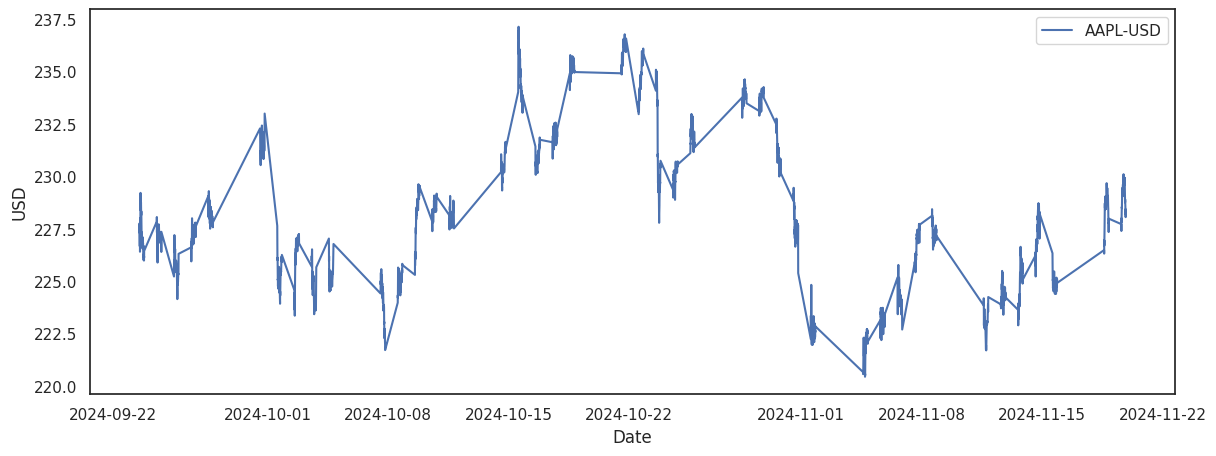

In [ ]:
output = dataset_aapl_df
plotDataset(dataset_aapl_df,"Datetime","Close",output,"SMA-9000")

### NaN Checking Function

In [ ]:
def NaNCheck(data):
  return data.isnull().sum()[data.isnull().sum()>0]

### Create Technical *Indicators*

Simple Moving Average :
- SMA3 - 15m
- SMA12 - 1h
- SMA20 - 100m
- SMA48 - 4h
- SMA50 - 250m
- SMA288 - 1d

Exponential Moving Average
- EMA12 - 1h
- EMA20 - 100m
- EMA26 - 130m

Moving Average Convergence/Divergence
- MACD12 - 1h
- MACD24 - 2h

Relative Strength Index
- RSI12 - 1h
- RSI24 - 2h
- RSI36 - 3h

Average True Range
- ATR12 - 1h
- ATR24 - 2h
- ATR36 - 3h

Bollinger Bands
- UpperBand12,LowerBand12 - 1h
- UpperBand24,LowerBand24 - 2h
- UpperBand36,LowerBand36 - 3h

MOM
- MoM10

OBV
- OBV

Ref: https://www.forex.in.rs/moving-average-for-5-min-chart/#:~:text=The%20best%20moving%20averages%20for,20%20MA%20and%2050%20MA.

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') # Can't use !cd in co-lab
!./configure --prefix=/usr
!make
!make install
os.chdir('../')
!pip install TA-Lib

import talib as tb

--2024-11-20 14:22:44--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 104.18.13.149, 104.18.12.149, 2606:4700::6812:c95, ...
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|104.18.13.149|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-11-20 14:22:44--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 104.18.13.149, 104.18.12.149, 2606:4700::6812:c95, ...
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-11-20 14:22:44--  http://gigenet.dl.source

In [ ]:
def CreateInd(dataset,Close,High,Low):

  new_df = dataset.copy()

  # Moving Average
  new_df["SMA3"] = tb.SMA(dataset[Close],timeperiod=3)
  new_df["SMA12"] = tb.SMA(dataset[Close],timeperiod=12)
  new_df["SMA20"] = tb.SMA(dataset[Close],timeperiod=20)
  new_df["SMA48"] = tb.SMA(dataset[Close],timeperiod=48)
  new_df["SMA50"] = tb.SMA(dataset[Close],timeperiod=50)
  new_df["SMA288"] = tb.SMA(dataset[Close],timeperiod=288)
  m1 = max(new_df[new_df['SMA288'].isnull()].index)

  #Exponential Moving Average
  new_df["EMA12"] = tb.EMA(dataset[Close], timeperiod=12)
  new_df["EMA20"] = tb.EMA(dataset[Close], timeperiod=20)
  new_df["EMA26"] = tb.EMA(dataset[Close], timeperiod=26)
  m2 = max(new_df[new_df['EMA26'].isnull()].index)

  # Moving Avarage Convergence Divergernce
  MACD12, macdsignal12, macdhist12 = tb.MACD(dataset[Close], fastperiod=18, slowperiod=6, signalperiod=12)
  MACD24, macdsignal24, macdhist24 = tb.MACD(dataset[Close], fastperiod=36, slowperiod=12, signalperiod=24)
  new_df["MACD12"] = MACD12
  new_df["MACD24"] = MACD24
  m3 = max(new_df[new_df['MACD24'].isnull()].index)

  # Relative Strength Index
  new_df["RSI12"] = tb.RSI(dataset[Close], timeperiod=12)
  new_df["RSI24"] = tb.RSI(dataset[Close], timeperiod=24)
  new_df["RSI36"] = tb.RSI(dataset[Close], timeperiod=36)
  m4 = max(new_df[new_df['RSI36'].isnull()].index)

  # Average True Range
  new_df["ATR12"] = tb.ATR(dataset[High], dataset[Low], dataset[Close], timeperiod=12)
  new_df["ATR24"] = tb.ATR(dataset[High], dataset[Low], dataset[Close], timeperiod=24)
  new_df["ATR36"] = tb.ATR(dataset[High], dataset[Low], dataset[Close], timeperiod=36)
  m5 = max(new_df[new_df['ATR36'].isnull()].index)

  # Bolinger Bands
  upperband12, middleband12, lowerband12 = tb.BBANDS(dataset[Close], timeperiod=12, nbdevup=2, nbdevdn=2, matype=0)
  upperband24, middleband24, lowerband24 = tb.BBANDS(dataset[Close], timeperiod=24, nbdevup=2, nbdevdn=2, matype=0)
  upperband36, middleband36, lowerband36 = tb.BBANDS(dataset[Close], timeperiod=36, nbdevup=2, nbdevdn=2, matype=0)
  new_df["Upperband12"] = upperband12 ; new_df["Lowerband12"] = lowerband12
  new_df["Upperband24"] = upperband24 ; new_df["Lowerband24"] = lowerband24
  new_df["Upperband36"] = upperband36 ; new_df["Lowerband36"] = lowerband36
  m6 = max(new_df[new_df['Upperband36'].isnull()].index)

  # Momentum
  new_df["MOM10"] = tb.MOM(dataset[Close], timeperiod=10)
  m7 = max(new_df[new_df['MOM10'].isnull()].index)

  # Volume Indicators
  new_df["OBV"] = tb.OBV(dataset[Close], dataset["Volume"])
  # m8 = max(new_df[new_df["OBV"].isnull()].index)

  # Remove NaN values
  m = max(m1,m2,m3,m4,m5,m6,m7)
  new_df = new_df.loc[m+1:]

  return new_df

#### Full Dataset with technical indicators

In [ ]:
dataset_Ind = CreateInd(dataset_aapl_df,"Close","High","Low")
dataset_Ind = dataset_Ind.reset_index()
dataset_Ind = dataset_Ind.drop(columns=["index"])
dataset_Ind.head()

,Datetime,High,Low,Open,Volume,Close,pct_change,log_change,SMA3,SMA12,...,ATR24,ATR36,Upperband12,Lowerband12,Upperband24,Lowerband24,Upperband36,Lowerband36,MOM10,OBV
0,2024-09-26 17:55:00,227.380005,227.054993,227.380005,181966,227.134995,-0.000990,-0.000991,227.318370,227.179916,...,0.327161,0.346530,227.635986,226.723847,227.553755,226.869453,227.697074,226.779160,0.044998,5151478.0
1,2024-09-26 18:00:00,227.255005,227.089996,227.149994,150379,227.114700,-0.000089,-0.000089,227.203267,227.176650,...,0.320404,0.341487,227.633978,226.719322,227.546079,226.861697,227.672074,226.778865,0.164703,5001099.0
2,2024-09-26 18:05:00,227.139999,226.970993,227.110001,218575,227.130005,0.000067,0.000067,227.126567,227.179984,...,0.314096,0.336696,227.635315,226.724652,227.534643,226.856358,227.629178,226.790761,0.320007,5219674.0
3,2024-09-26 18:10:00,227.369995,227.080002,227.119995,166462,227.320099,0.000837,0.000837,227.188268,227.210826,...,0.313092,0.335399,227.649499,226.772152,227.544979,226.862698,227.634926,226.794463,0.520096,5386136.0
4,2024-09-26 18:15:00,227.600006,227.330002,227.339996,261276,227.389893,0.000307,0.000307,227.279999,227.259150,...,0.311709,0.333857,227.633620,226.884681,227.561739,226.864254,227.641188,226.812640,0.234894,5647412.0


In [ ]:
NaNCheck(dataset_Ind)

,0


In [ ]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days

    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)

    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['Close'],label='Closing Price', color='b')
    plt.plot(dataset['SMA20'],label='SMA 100m', color='g',linestyle='--')
    plt.plot(dataset['SMA50'],label='SMA 250m', color='r',linestyle='--')
    plt.plot(dataset['Upperband12'],label='Upper Band 1h', color='c')
    plt.plot(dataset['Lowerband12'],label='Lower Band 1h', color='c')
    plt.fill_between(x_, dataset['Lowerband12'], dataset['Upperband12'], alpha=0.15)
    plt.title('Technical indicators for  AAPL- last {} Time intervals.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot
    plt.subplot(2, 1, 2)
    plt.title('MACD12')
    plt.plot(dataset['MACD12'],label='MACD 1h', linestyle='-.')
    plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['MOM10'],label='Momentum 10', color='b',linestyle='-')

    plt.legend()
    plt.show()

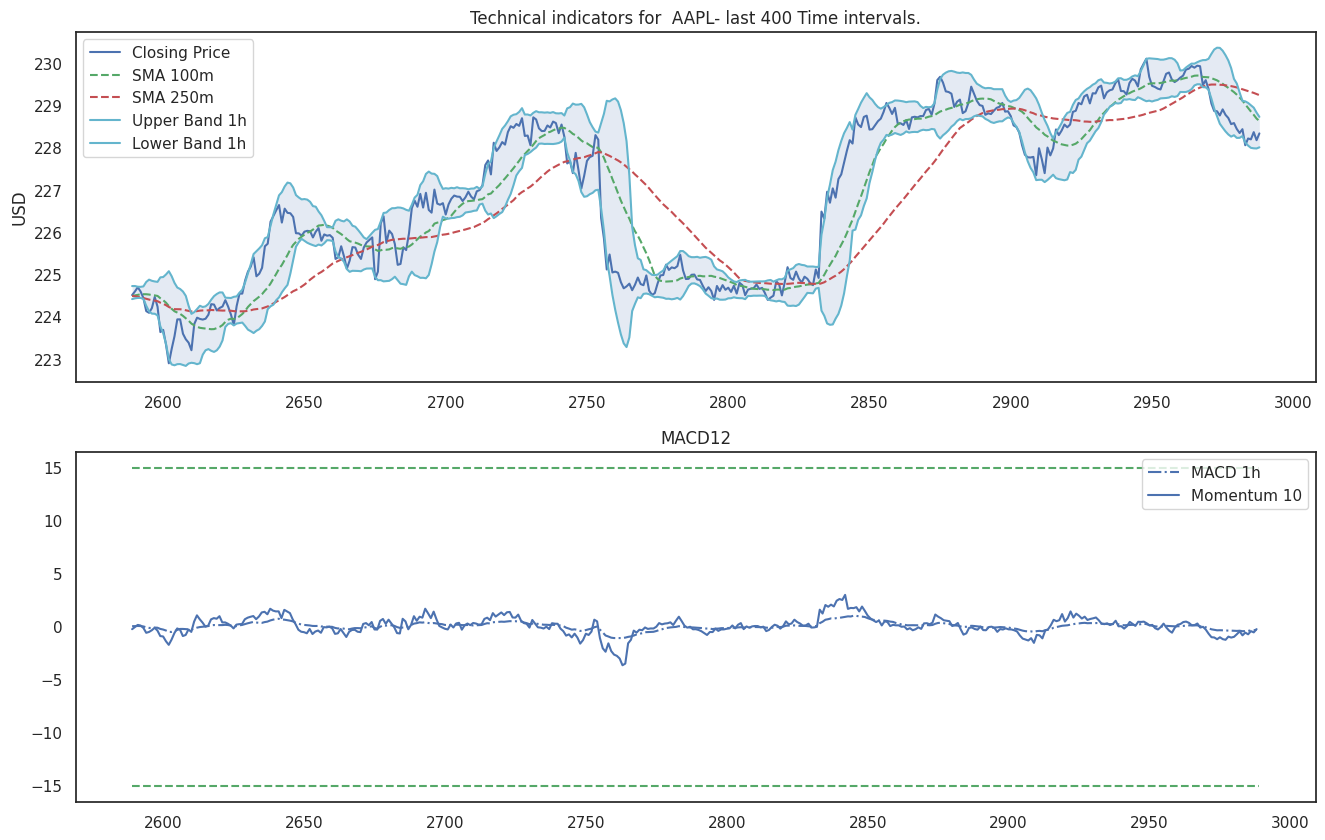

In [ ]:
plot_technical_indicators(dataset_Ind,400)

In [ ]:
dataset_Ind.columns

Index(['Datetime', 'High', 'Low', 'Open', 'Volume', 'Close', 'pct_change',
       'log_change', 'SMA3', 'SMA12', 'SMA20', 'SMA48', 'SMA50', 'SMA288',
       'EMA12', 'EMA20', 'EMA26', 'MACD12', 'MACD24', 'RSI12', 'RSI24',
       'RSI36', 'ATR12', 'ATR24', 'ATR36', 'Upperband12', 'Lowerband12',
       'Upperband24', 'Lowerband24', 'Upperband36', 'Lowerband36', 'MOM10',
       'OBV'],
      dtype='object')

In [ ]:
dataset_Ind.shape

(2989, 33)

### Extract Multi frequency *trends*

#### Fourier Transformed values for Close price

In [ ]:
# Do Inverse Fourier Transformation and extract Multi-Frequency trading patterns
close_fft = np.fft.fft(np.asarray(dataset_Ind['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
output_df_fft = fft_df.copy()

<ipython-input-41-5dd487a29a69>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  output_df_fft[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10).astype('float')
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
<ipython-input-41-5dd487a29a69>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  output_df_fft[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10).astype('float')
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex value

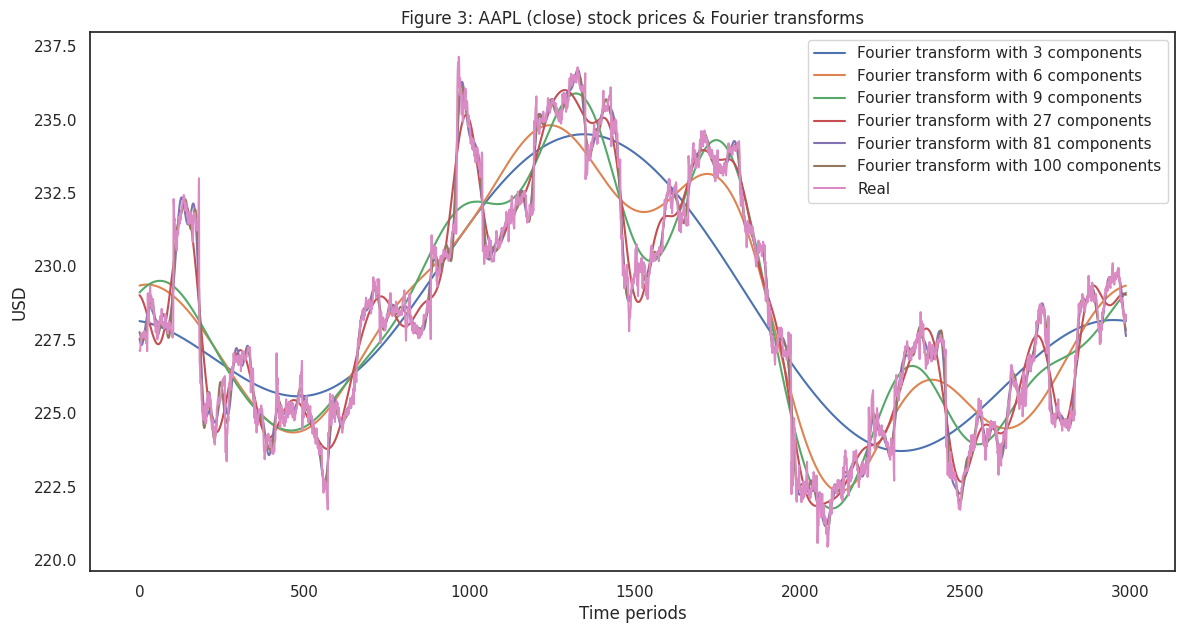

In [ ]:
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 27, 81, 100]:
    fft_list_m10= np.copy(fft_list)
    fft_list_m10[num_:-num_]=0
    output_df_fft[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10).astype('float')
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(dataset_Ind['Close'],  label='Real')
plt.xlabel('Time periods')
plt.ylabel('USD')
plt.title('Figure 3: AAPL (close) stock prices & Fourier transforms')
plt.legend()
plt.show()

In [ ]:
output_df_fft.head()

,fft,absolute,angle,FT_3components,FT_6components,FT_9components,FT_27components,FT_81components,FT_100components
0,682503.871323+ 0.000000j,682503.871323,0.000000,228.135129,229.345919,229.111578,229.019097,227.542955,227.759832
1,-4780.954999- 2578.679928j,5432.045735,-2.646951,228.133271,229.348856,229.123427,229.005757,227.473947,227.710513
2,4008.360629+ 1724.538977j,4363.598242,0.406297,228.131368,229.351657,229.135135,228.990844,227.417021,227.666014
3,937.216891+ 289.283885j,980.846913,0.299385,228.129419,229.354322,229.146700,228.974356,227.372702,227.626271
4,50.945876- 1548.792011j,1549.629690,-1.537914,228.127425,229.356852,229.158121,228.956299,227.341303,227.591256


In [ ]:
output_df_fft.shape

(2989, 9)

#### Merge Fourier transformed values & full dataset with technical indicators

In [ ]:
df_ind_fft = pd.concat([dataset_Ind,output_df_fft[["FT_3components",	"FT_6components",	"FT_9components",	"FT_27components",	"FT_81components",	"FT_100components"]]], axis=1)
df_ind_fft

,Datetime,High,Low,Open,Volume,Close,pct_change,log_change,SMA3,SMA12,...,Upperband36,Lowerband36,MOM10,OBV,FT_3components,FT_6components,FT_9components,FT_27components,FT_81components,FT_100components
0,2024-09-26 17:55:00,227.380005,227.054993,227.380005,181966,227.134995,-0.000990,-0.000991,227.318370,227.179916,...,227.697074,226.779160,0.044998,5151478.0,228.135129,229.345919,229.111578,229.019097,227.542955,227.759832
1,2024-09-26 18:00:00,227.255005,227.089996,227.149994,150379,227.114700,-0.000089,-0.000089,227.203267,227.176650,...,227.672074,226.778865,0.164703,5001099.0,228.133271,229.348856,229.123427,229.005757,227.473947,227.710513
2,2024-09-26 18:05:00,227.139999,226.970993,227.110001,218575,227.130005,0.000067,0.000067,227.126567,227.179984,...,227.629178,226.790761,0.320007,5219674.0,228.131368,229.351657,229.135135,228.990844,227.417021,227.666014
3,2024-09-26 18:10:00,227.369995,227.080002,227.119995,166462,227.320099,0.000837,0.000837,227.188268,227.210826,...,227.634926,226.794463,0.520096,5386136.0,228.129419,229.354322,229.146700,228.974356,227.372702,227.626271
4,2024-09-26 18:15:00,227.600006,227.330002,227.339996,261276,227.389893,0.000307,0.000307,227.279999,227.259150,...,227.641188,226.812640,0.234894,5647412.0,228.127425,229.356852,229.158121,228.956299,227.341303,227.591256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,2024-11-19 20:35:00,228.299896,228.029999,228.050003,274607,228.220001,0.000702,0.000701,228.240000,228.556985,...,230.365877,228.139946,-0.544998,17824869.0,228.143728,229.329190,229.050311,229.062530,228.037467,228.081212
2985,2024-11-19 20:40:00,228.270004,228.100006,228.223495,233725,228.199997,-0.000088,-0.000088,228.159999,228.501568,...,230.367156,228.056445,-0.708801,17591144.0,228.142100,229.332808,229.062826,229.056890,227.922501,228.006856
2986,2024-11-19 20:45:00,228.369995,228.119995,228.179993,304316,228.369995,0.000745,0.000745,228.263331,228.468651,...,230.365699,227.997001,-0.410004,17895460.0,228.140426,229.336290,229.075213,229.049748,227.814259,227.937525
2987,2024-11-19 20:50:00,228.720001,228.162598,228.360001,672010,228.179993,-0.000832,-0.000832,228.249995,228.407917,...,230.371814,227.920886,-0.525009,17223450.0,228.138706,229.339636,229.087468,229.041080,227.714115,227.873264


In [ ]:
df_ind_fft.columns

Index(['Datetime', 'High', 'Low', 'Open', 'Volume', 'Close', 'pct_change',
       'log_change', 'SMA3', 'SMA12', 'SMA20', 'SMA48', 'SMA50', 'SMA288',
       'EMA12', 'EMA20', 'EMA26', 'MACD12', 'MACD24', 'RSI12', 'RSI24',
       'RSI36', 'ATR12', 'ATR24', 'ATR36', 'Upperband12', 'Lowerband12',
       'Upperband24', 'Lowerband24', 'Upperband36', 'Lowerband36', 'MOM10',
       'OBV', 'FT_3components', 'FT_6components', 'FT_9components',
       'FT_27components', 'FT_81components', 'FT_100components'],
      dtype='object')

In [ ]:
df_ind_fft.shape

(2989, 39)

### Save Processed dataframe with all added features

In [ ]:
processed_data_root = "/content/drive/MyDrive/FYP/Stock/DataSet/Preprocessed/"
processed_file_path = processed_data_root + 'aapl_df_ind_fft.csv'
df_ind_fft.to_csv(processed_file_path, index=False)

### PCA

In [ ]:
df_pca=pd.read_csv(processed_file_path)
df_pca

,Datetime,High,Low,Open,Volume,Close,pct_change,log_change,SMA3,SMA12,...,Upperband36,Lowerband36,MOM10,OBV,FT_3components,FT_6components,FT_9components,FT_27components,FT_81components,FT_100components
0,2024-09-26 17:55:00,227.380005,227.054993,227.380005,181966,227.134995,-0.000990,-0.000991,227.318370,227.179916,...,227.697074,226.779160,0.044998,5151478.0,228.135129,229.345919,229.111578,229.019097,227.542955,227.759832
1,2024-09-26 18:00:00,227.255005,227.089996,227.149994,150379,227.114700,-0.000089,-0.000089,227.203267,227.176650,...,227.672074,226.778865,0.164703,5001099.0,228.133271,229.348856,229.123427,229.005757,227.473947,227.710513
2,2024-09-26 18:05:00,227.139999,226.970993,227.110001,218575,227.130005,0.000067,0.000067,227.126567,227.179984,...,227.629178,226.790761,0.320007,5219674.0,228.131368,229.351657,229.135135,228.990844,227.417021,227.666014
3,2024-09-26 18:10:00,227.369995,227.080002,227.119995,166462,227.320099,0.000837,0.000837,227.188268,227.210826,...,227.634926,226.794463,0.520096,5386136.0,228.129419,229.354322,229.146700,228.974356,227.372702,227.626271
4,2024-09-26 18:15:00,227.600006,227.330002,227.339996,261276,227.389893,0.000307,0.000307,227.279999,227.259150,...,227.641188,226.812640,0.234894,5647412.0,228.127425,229.356852,229.158121,228.956299,227.341303,227.591256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,2024-11-19 20:35:00,228.299896,228.029999,228.050003,274607,228.220001,0.000702,0.000701,228.240000,228.556985,...,230.365877,228.139946,-0.544998,17824869.0,228.143728,229.329190,229.050311,229.062530,228.037467,228.081212
2985,2024-11-19 20:40:00,228.270004,228.100006,228.223495,233725,228.199997,-0.000088,-0.000088,228.159999,228.501568,...,230.367156,228.056445,-0.708801,17591144.0,228.142100,229.332808,229.062826,229.056890,227.922501,228.006856
2986,2024-11-19 20:45:00,228.369995,228.119995,228.179993,304316,228.369995,0.000745,0.000745,228.263331,228.468651,...,230.365699,227.997001,-0.410004,17895460.0,228.140426,229.336290,229.075213,229.049748,227.814259,227.937525
2987,2024-11-19 20:50:00,228.720001,228.162598,228.360001,672010,228.179993,-0.000832,-0.000832,228.249995,228.407917,...,230.371814,227.920886,-0.525009,17223450.0,228.138706,229.339636,229.087468,229.041080,227.714115,227.873264


In [ ]:
df_pca=df_pca.drop(['Datetime'], axis=1)
df_pca.columns

Index(['High', 'Low', 'Open', 'Volume', 'Close', 'pct_change', 'log_change',
       'SMA3', 'SMA12', 'SMA20', 'SMA48', 'SMA50', 'SMA288', 'EMA12', 'EMA20',
       'EMA26', 'MACD12', 'MACD24', 'RSI12', 'RSI24', 'RSI36', 'ATR12',
       'ATR24', 'ATR36', 'Upperband12', 'Lowerband12', 'Upperband24',
       'Lowerband24', 'Upperband36', 'Lowerband36', 'MOM10', 'OBV',
       'FT_3components', 'FT_6components', 'FT_9components', 'FT_27components',
       'FT_81components', 'FT_100components'],
      dtype='object')

In [ ]:
NaNCheck(df_pca)

,0


#### Standardizing the data

In [ ]:
X = df_pca.values # matrix of dataframe
sc = StandardScaler()
X_std = sc.fit_transform(X) # standardizing the data

#### Apply PCA

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_std) # fit and reduce dimensions
print(pca.n_components_)

38


##### Determine the number of components

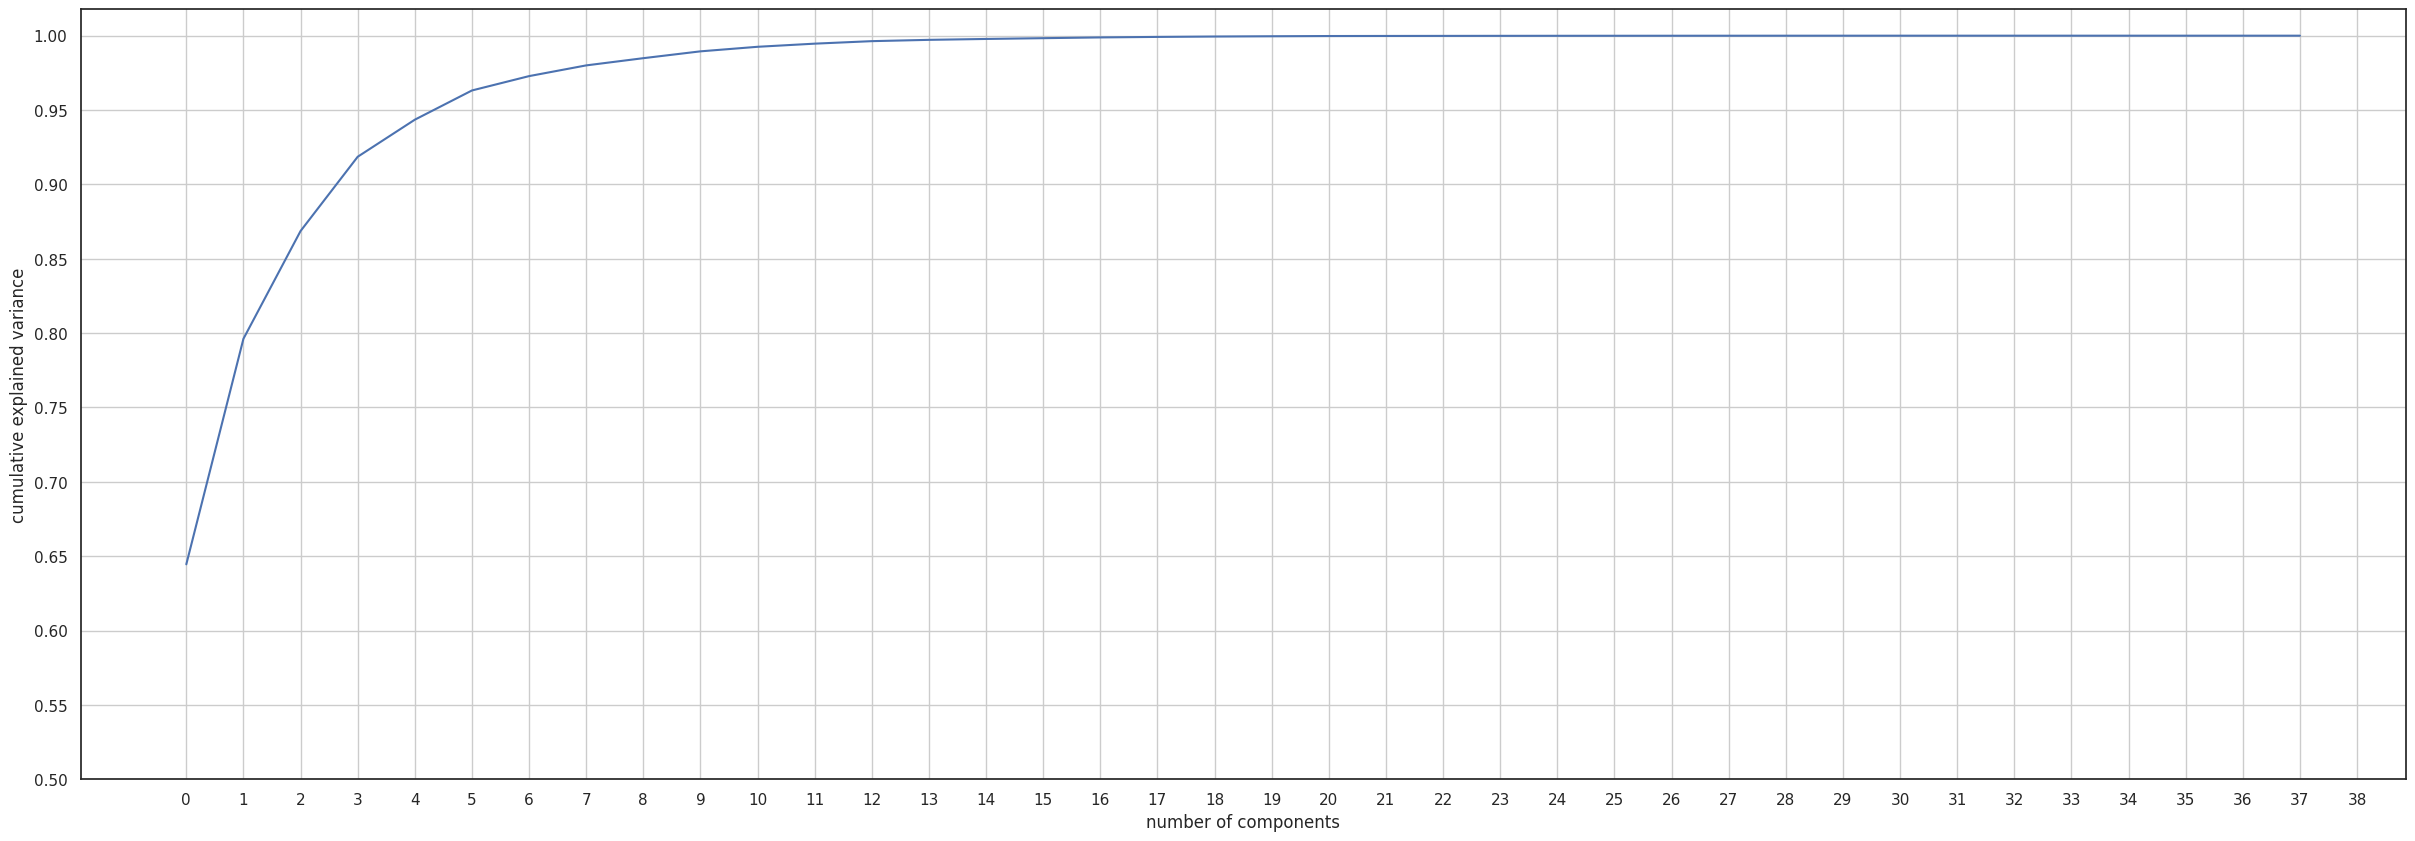

In [ ]:
plt.figure(figsize=(30, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(0, df_pca.shape[1]+1, 1.0))
plt.yticks(np.arange(0.5, 1.05, 0.05))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

Select num_components = 14

##### Dimensionality Reduction

In [ ]:
num_components = 14
pca = PCA(num_components)
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

In [ ]:
print(df_pca.shape)
print(X_pca.shape)

(2989, 38)
(2989, 14)


##### Finding the most important features set

In [ ]:
n_pcs= pca.n_components_ # get number of component

# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df_pca.columns

# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
for i in most_important_names:
  print(i,end="\n")

EMA12
RSI24
ATR24
log_change
Volume
MOM10
OBV
OBV
RSI12
SMA288
ATR12
Lowerband36
Upperband36
FT_3components


In [ ]:
df_PCA=X_pca.copy()
df_PCA = pd.DataFrame(df_PCA,columns=["pca1","pca2","pca3","pca4","pca5","pca6","pca7","pca8","pca9","pca10","pca11","pca12","pca13","pca14"])
df_PCA.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14
0,-1.240948,0.310626,-1.082059,-0.804547,-0.344281,-0.120601,-0.867292,-1.113040,-0.232223,-0.765979,-0.326380,0.218670,-0.022667,-0.224595
1,-1.276310,0.472185,-1.024411,0.040224,-0.310662,-0.197822,-0.917886,-1.065268,-0.372546,-0.765072,-0.328814,0.251497,0.030292,-0.241226
2,-1.290061,0.576287,-1.040110,0.201550,-0.175207,-0.078331,-0.962452,-1.017633,-0.331210,-0.755273,-0.366515,0.289240,0.069021,-0.271961
3,-1.221648,1.196349,-0.733527,0.835891,-0.238191,-0.117287,-0.944289,-1.071218,-0.067758,-0.717330,-0.298405,0.272058,0.012933,-0.230642
4,-1.150649,1.161411,-0.804861,0.322088,-0.066815,-0.113290,-0.776544,-1.211256,0.144429,-0.707064,-0.262613,0.168363,-0.060557,-0.182320


### Feature Selection

In [ ]:
df=df_PCA.copy()
df["Close"] = df_pca["Close"]
df

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,Close
0,-1.240948,0.310626,-1.082059,-0.804547,-0.344281,-0.120601,-0.867292,-1.113040,-0.232223,-0.765979,-0.326380,0.218670,-0.022667,-0.224595,227.134995
1,-1.276310,0.472185,-1.024411,0.040224,-0.310662,-0.197822,-0.917886,-1.065268,-0.372546,-0.765072,-0.328814,0.251497,0.030292,-0.241226,227.114700
2,-1.290061,0.576287,-1.040110,0.201550,-0.175207,-0.078331,-0.962452,-1.017633,-0.331210,-0.755273,-0.366515,0.289240,0.069021,-0.271961,227.130005
3,-1.221648,1.196349,-0.733527,0.835891,-0.238191,-0.117287,-0.944289,-1.071218,-0.067758,-0.717330,-0.298405,0.272058,0.012933,-0.230642,227.320099
4,-1.150649,1.161411,-0.804861,0.322088,-0.066815,-0.113290,-0.776544,-1.211256,0.144429,-0.707064,-0.262613,0.168363,-0.060557,-0.182320,227.389893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,0.348590,-1.710591,-2.746348,1.589873,0.482677,-0.118955,-0.547182,0.461750,-0.620571,-0.365824,0.248970,0.025608,0.377189,-0.041973,228.220001
2985,0.308493,-1.910803,-3.004984,0.916878,0.358258,-0.081506,-0.514922,0.401825,-0.505900,-0.392472,0.278351,-0.010161,0.368929,-0.031162,228.199997
2986,0.334119,-1.162621,-2.570122,1.559017,0.496028,0.013543,-0.505794,0.351383,-0.234828,-0.350352,0.289331,-0.033006,0.329121,-0.013923,228.369995
2987,0.258232,-1.905856,-2.621428,0.109140,0.997974,0.422151,-0.621590,0.336270,-0.276890,-0.382468,0.210829,-0.040130,0.304080,-0.015805,228.179993


In [ ]:
NaNCheck(df)

,0


In [ ]:
print('Total dataset has {} samples, and {} features.'.format(df.shape[0], \
                                                              df.shape[1]))

Total dataset has 2989 samples, and 15 features.


In [ ]:
labels_df = df["Close"]
features_df = df.drop(columns=["Close"])

#### XGBoost

In [ ]:
def get_feature_importance_data(data_income):
    data = data_income.copy()
    y = data['Close']
    X = data.drop(columns=["Close"])

    train_samples = int(X.shape[0] * 0.5)

    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]

    return (X_train, y_train), (X_test, y_test)

In [ ]:
# Get training and test data
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(df)

In [ ]:
X_train_FI.columns

Index(['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9',
       'pca10', 'pca11', 'pca12', 'pca13', 'pca14'],
      dtype='object')

In [ ]:
print("Shape of x_train : ",X_train_FI.shape[0],",", X_train_FI.shape[1])
print("Shape of x_test : ",X_test_FI.shape[0],",", X_test_FI.shape[1])

Shape of x_train :  1494 , 14
Shape of x_test :  1495 , 14


In [ ]:
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=150,base_score=0.7,colsample_bytree=1,learning_rate=0.05)

In [ ]:
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)

In [ ]:
eval_result = regressor.evals_result()
eval_result

{'validation_0': OrderedDict([('rmse',
               [217.37409808325262,
                206.5161774766607,
                196.2009849918605,
                186.4013952568158,
                177.09166464352185,
                168.24733019010975,
                159.84513682184274,
                151.86301124446646,
                144.27997739170337,
                137.0761090957614,
                130.23246702047828,
                123.73107775491957,
                117.55446368808114,
                111.68634640737247,
                106.1113271364244,
                100.81476461602428,
                95.7827355340472,
                91.00204535195175,
                86.4601134986176,
                82.14495743652672,
                78.04523375609149,
                74.15028950367427,
                70.44975171065558,
                66.93405422838792,
                63.593866702113345,
                60.4204956508177,
                57.40553818132061,
       

In [ ]:
training_rounds = range(len(eval_result['validation_0']['rmse']))
training_rounds

range(0, 150)

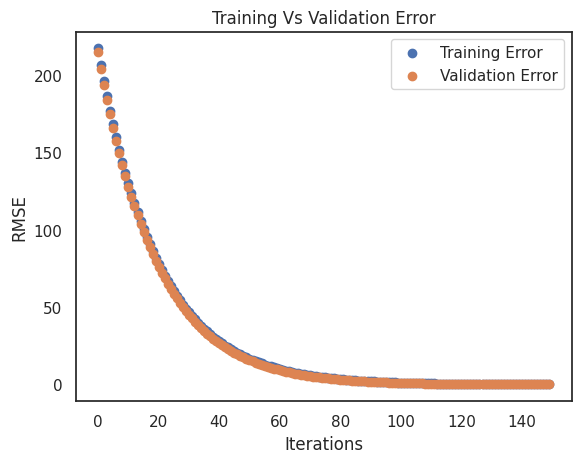

In [ ]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

#### Check Feature importance

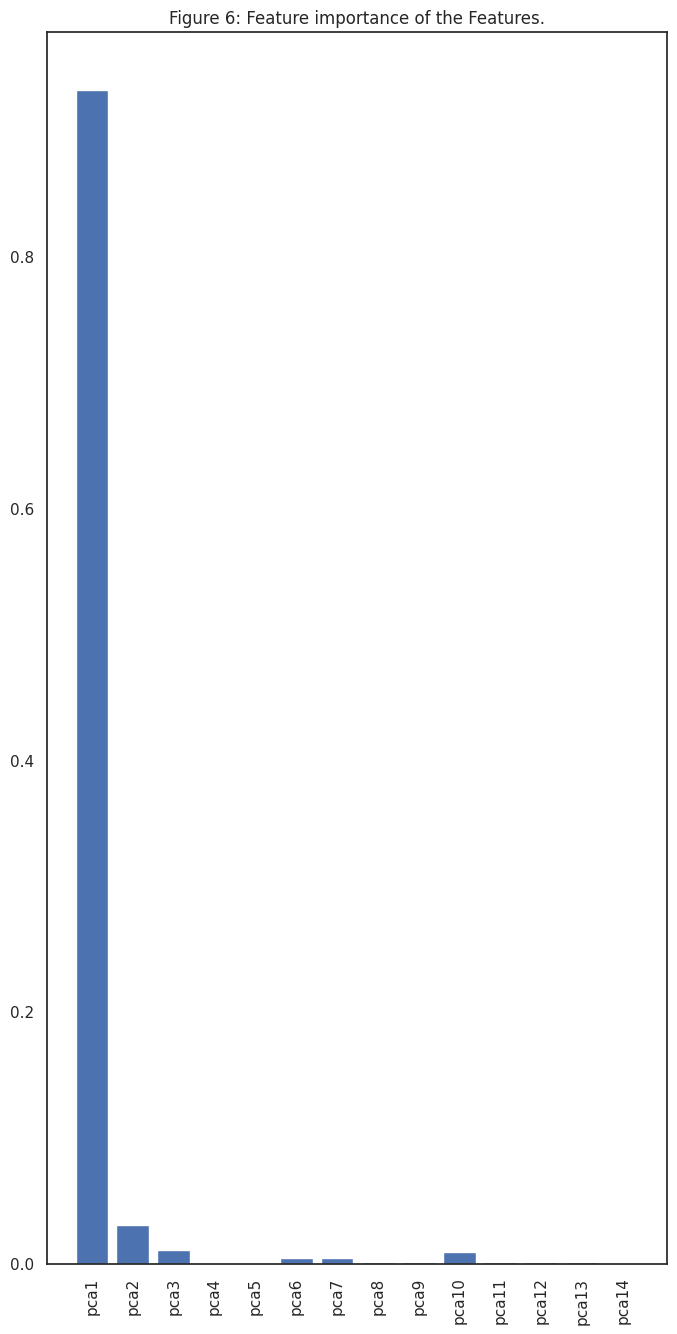

In [ ]:
fig = plt.figure(figsize=(8,16))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure 6: Feature importance of the Features.')
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

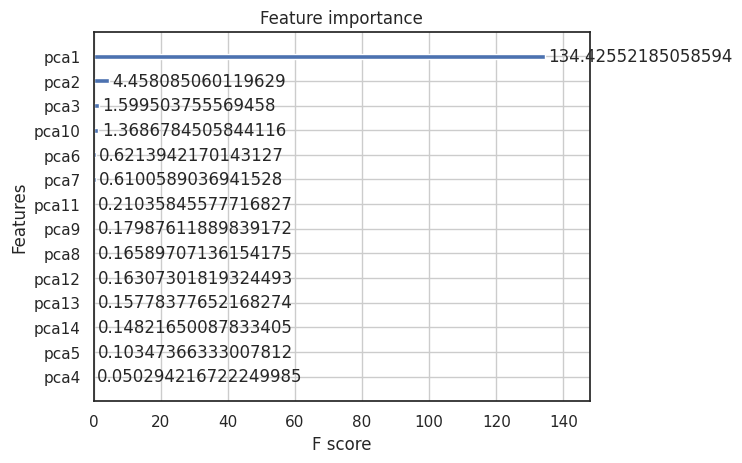

In [ ]:
xgb.plot_importance(xgbModel, importance_type='gain')

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

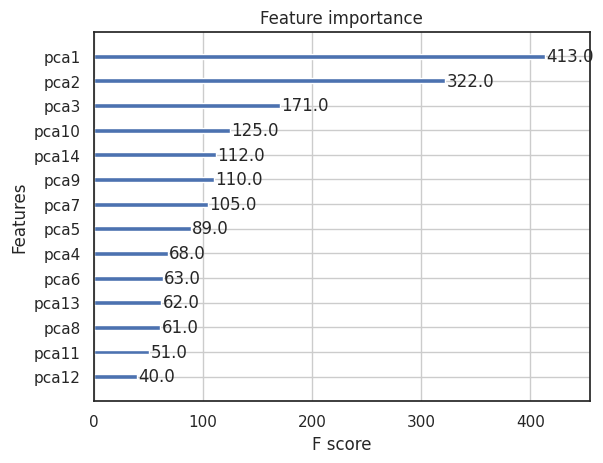

In [ ]:
xgb.plot_importance(xgbModel, importance_type='weight')

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

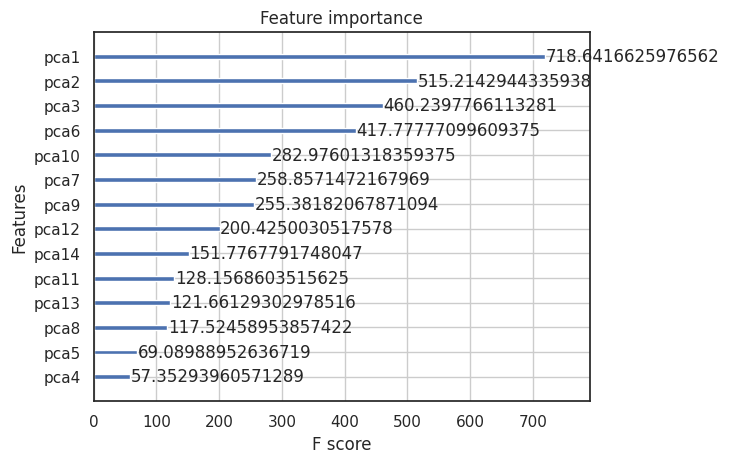

In [ ]:
xgb.plot_importance(xgbModel, importance_type='cover')

In [ ]:
df = df.drop(columns=["pca4"])

In [ ]:
df.shape

(2989, 14)

#### Identifying Feature Correlation

<Axes: >

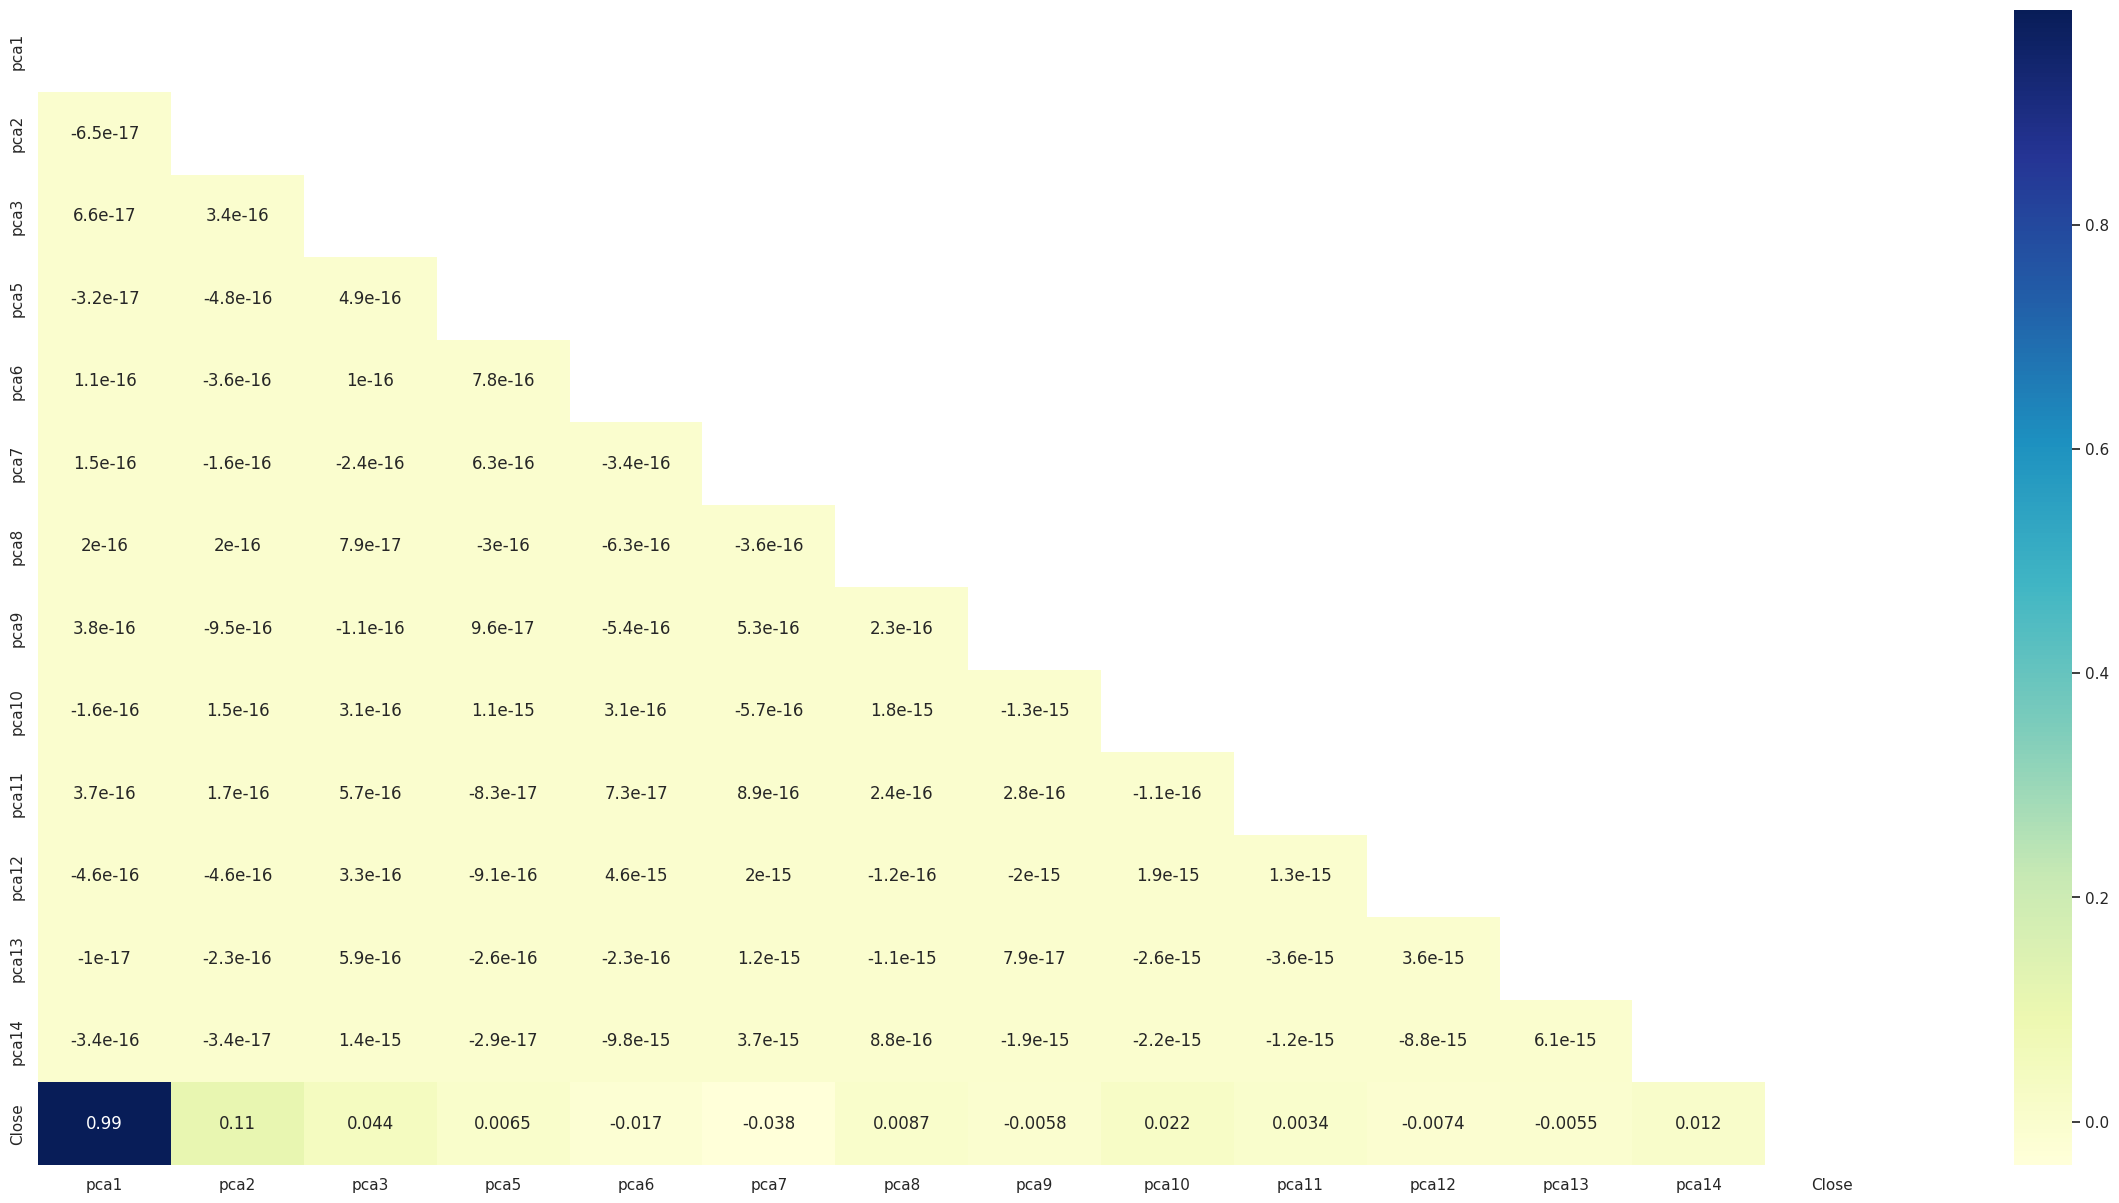

In [ ]:
corr= df.corr()
matrix = np.triu(corr)

plt.figure(figsize=[30,15])
sns.heatmap(corr, annot=True, mask=matrix,cmap="YlGnBu")

### Save CSV

In [ ]:
NaNCheck(df)

,0


In [ ]:
df

,pca1,pca2,pca3,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,Close
0,-1.240948,0.310626,-1.082059,-0.344281,-0.120601,-0.867292,-1.113040,-0.232223,-0.765979,-0.326380,0.218670,-0.022667,-0.224595,227.134995
1,-1.276310,0.472185,-1.024411,-0.310662,-0.197822,-0.917886,-1.065268,-0.372546,-0.765072,-0.328814,0.251497,0.030292,-0.241226,227.114700
2,-1.290061,0.576287,-1.040110,-0.175207,-0.078331,-0.962452,-1.017633,-0.331210,-0.755273,-0.366515,0.289240,0.069021,-0.271961,227.130005
3,-1.221648,1.196349,-0.733527,-0.238191,-0.117287,-0.944289,-1.071218,-0.067758,-0.717330,-0.298405,0.272058,0.012933,-0.230642,227.320099
4,-1.150649,1.161411,-0.804861,-0.066815,-0.113290,-0.776544,-1.211256,0.144429,-0.707064,-0.262613,0.168363,-0.060557,-0.182320,227.389893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,0.348590,-1.710591,-2.746348,0.482677,-0.118955,-0.547182,0.461750,-0.620571,-0.365824,0.248970,0.025608,0.377189,-0.041973,228.220001
2985,0.308493,-1.910803,-3.004984,0.358258,-0.081506,-0.514922,0.401825,-0.505900,-0.392472,0.278351,-0.010161,0.368929,-0.031162,228.199997
2986,0.334119,-1.162621,-2.570122,0.496028,0.013543,-0.505794,0.351383,-0.234828,-0.350352,0.289331,-0.033006,0.329121,-0.013923,228.369995
2987,0.258232,-1.905856,-2.621428,0.997974,0.422151,-0.621590,0.336270,-0.276890,-0.382468,0.210829,-0.040130,0.304080,-0.015805,228.179993


In [ ]:
df.to_csv("/content/drive/MyDrive/FYP/Stock/DataSet/Preprocessed/aapl_pca.csv", index=False)